In [1]:
from sidemethods import load_richardson_data, convert_to_float
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


# local path to model repository on our servers
server_model_path = "/mounts/data/corp/huggingface/"
# loading the original human data as vectors for each action word
_, richardson_data, richardson_normed = load_richardson_data()
action_words = richardson_normed.keys()

In [2]:
def get_construct_sims(model_choices):
    similarity_scores_items = {}
    similarity_scores_constructs = {'Horizontal':0, 'Neutral':0, 'Vertical':0, 'Horizon.':0, 'Neutr.':0, 'Vertic.':0}

    for idx, key in enumerate(richardson_data):

        # for each item
        vec1 = np.array(richardson_data[key])
        vec2 = np.array(model_choices[key])
        similarity = cosine_similarity([vec1], [vec2])[0][0]
        similarity_scores_items[key] = similarity

    count = 0
    for i in range(0,len(similarity_scores_items),5): # every 5th item is a different construct 
        current_constr = list(similarity_scores_constructs.keys())[count]
        constr_sum = round((sum(list(similarity_scores_items.values())[i:i+4])/5),4)
        similarity_scores_constructs[current_constr] = constr_sum
        count+=1

    return similarity_scores_constructs

In [44]:
model_name_A = "meta-llama/Llama-2-70b-chat-hf"
model_name_B = "meta-llama/Llama-2-13b-chat-hf"

model_names = [model_name_A, model_name_B]

In [45]:
data = []
for model_name in model_names:
    model_choices = dict()
    with open("results/TEXT_"+model_name.split("/")[1]+"_selections.txt", "r") as f_in:
        lines = f_in.readlines()

    for idx,line in enumerate(lines):
        if idx == 0:
            continue
        parts = line.split("\t")
        parts[-1].replace("\n","")
        model_choices[parts[0]] = [int(x) for x in parts[1:]]
    
    data.append(model_choices)

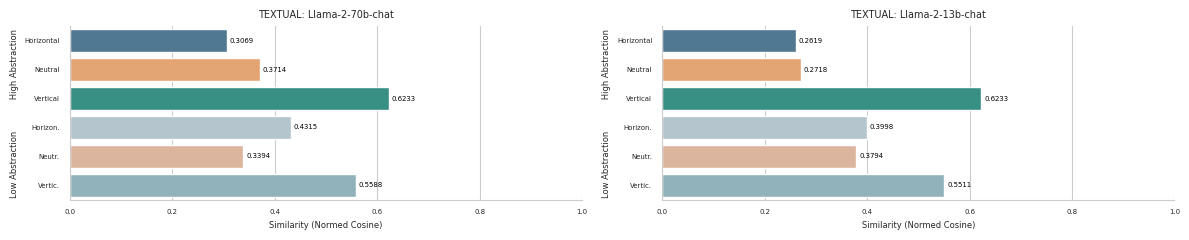

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume similarity_scores_constructs1 and similarity_scores_constructs2 are given
data1 = get_construct_sims(data[0])
data2 = get_construct_sims(data[1])
custom_palette = ['#457b9d', '#f4a261', '#2a9d8f', '#b0c6d1', '#e5b293', '#8ab6c1']

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 2.5))

# Plot for the first data dictionary
sns.set_style("whitegrid", rc={'axes.grid.axis': 'x'})
sns.barplot(x=list(data1.values()), y=list(data1.keys()), palette=custom_palette, ax=axs[0])

axs[0].set_xlabel('Similarity (Normed Cosine)', fontsize=6)
axs[0].set_ylabel('Low Abstraction            High Abstraction', fontsize=6)
axs[0].set_title('TEXTUAL: '+model_names[0].split("/")[1].replace("-hf",""), fontsize=7)

for i, value in enumerate(data1.values()):
    axs[0].text(value + 0.005, i, f'{value:.4f}', va='center', fontsize=5, color='black')

axs[0].set_xlim(0, 1)
sns.despine(ax=axs[0])
axs[0].tick_params(axis='both', labelsize=5)

# Plot for the second data dictionary
sns.set_style("whitegrid", rc={'axes.grid.axis': 'x'})
sns.barplot(x=list(data2.values()), y=list(data2.keys()), palette=custom_palette, ax=axs[1])

axs[1].set_xlabel('Similarity (Normed Cosine)', fontsize=6)
axs[1].set_ylabel('Low Abstraction            High Abstraction', fontsize=6)
axs[1].set_title('TEXTUAL: '+model_names[1].split("/")[1].replace("-hf",""), fontsize=7)

for i, value in enumerate(data2.values()):
    axs[1].text(value + 0.005, i, f'{value:.4f}', va='center', fontsize=5, color='black')

axs[1].set_xlim(0, 1)
sns.despine(ax=axs[1])
axs[1].tick_params(axis='both', labelsize=5)
plt.savefig('results/TEXT_Llama-2_70and13.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


In [47]:
data = []
for model_name in model_names:
    model_choices = dict()
    with open("results/UNICODE_"+model_name.split("/")[1]+"_selections.txt", "r") as f_in:
        lines = f_in.readlines()

    for idx,line in enumerate(lines):
        if idx == 0:
            continue
        parts = line.split("\t")
        parts[-1].replace("\n","")
        model_choices[parts[0]] = [int(x) for x in parts[1:]]
    
    data.append(model_choices)

In [6]:
data1 = get_construct_sims(data[0])
data2 = get_construct_sims(data[1])
custom_palette = ['#457b9d', '#f4a261', '#2a9d8f', '#b0c6d1', '#e5b293', '#8ab6c1']

fig, axs = plt.subplots(1, 2, figsize=(12, 2.5))

# Plot for the first data dictionary
sns.set_style("whitegrid", rc={'axes.grid.axis': 'x'})
sns.barplot(x=list(data1.values()), y=list(data1.keys()), palette=custom_palette, ax=axs[0])

axs[0].set_xlabel('Similarity (Normed Cosine)', fontsize=6)
axs[0].set_ylabel('Low Abstraction            High Abstraction', fontsize=6)
axs[0].set_title('PSEUDO-VISUAL: '+model_names[0].split("/")[1].replace("-hf",""), fontsize=7)

for i, value in enumerate(data1.values()):
    axs[0].text(value + 0.005, i, f'{value:.4f}', va='center', fontsize=5, color='black')

axs[0].set_xlim(0, 1)
sns.despine(ax=axs[0])
axs[0].tick_params(axis='both', labelsize=5)

# Plot for the second data dictionary
sns.set_style("whitegrid", rc={'axes.grid.axis': 'x'})
sns.barplot(x=list(data2.values()), y=list(data2.keys()), palette=custom_palette, ax=axs[1])

axs[1].set_xlabel('Similarity (Normed Cosine)', fontsize=6)
axs[1].set_ylabel('Low Abstraction            High Abstraction', fontsize=6)
axs[1].set_title('PSEUDO-VISUAL: '+model_names[1].split("/")[1].replace("-hf",""), fontsize=7)

for i, value in enumerate(data2.values()):
    axs[1].text(value + 0.005, i, f'{value:.4f}', va='center', fontsize=5, color='black')

axs[1].set_xlim(0, 1)
sns.despine(ax=axs[1])
axs[1].tick_params(axis='both', labelsize=5)
plt.savefig('results/UNICODE_Llama-2_70and13.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


KeyError: 0

## Average Similarities

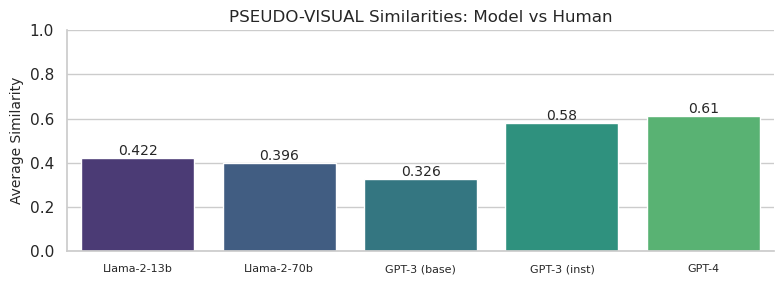

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and process the data from the file
file_path = "results/UNICODE_average_similarities.txt"
data = pd.read_csv(file_path, delimiter='\t')

# Filter out specific models
models_to_exclude = ['Llama-2-13b-hf', 'Llama-2-70b-hf']
data = data[~data['Model'].isin(models_to_exclude)]

# Rename models
model_mapping = {
    'Llama-2-13b-chat-hf': 'Llama-2-13b',
    'Llama-2-70b-chat-hf': 'Llama-2-70b',
    'davinci-002': 'GPT-3 (base)',
    'text-davinci-003': 'GPT-3 (inst)',
    'gpt-4': 'GPT-4'
}
data['Model'] = data['Model'].map(model_mapping)

# Set Seaborn style and color palette
sns.set(style="whitegrid")
sns.set_palette("viridis")

# Create bar plot with y-axis scaled to 0-1
plt.figure(figsize=(8, 3))
bars = sns.barplot(x="Model", y="Average Similarity", data=data)

# Set y-axis limits to 0-1
plt.ylim(0, 1)

# Add labels and title
plt.ylabel('Average Similarity', fontsize=10)
plt.xlabel('', fontsize=10)
plt.title('PSEUDO-VISUAL Similarities: Model vs Human', fontsize=12)

# Add data values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center', fontsize=8)

# Remove the top and right spines for aesthetics
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


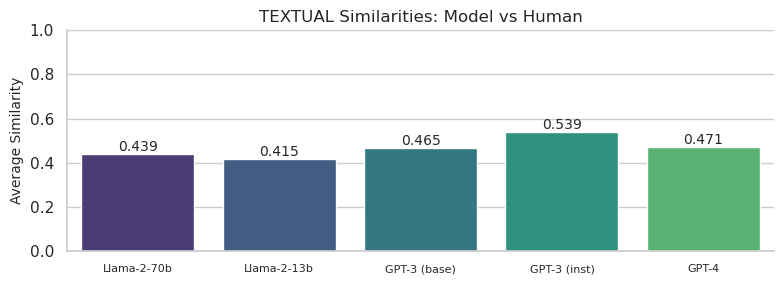

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and process the data from the file
file_path = "results/TEXT_average_similarities.txt"
data = pd.read_csv(file_path, delimiter='\t')

# Filter out specific models
models_to_exclude = ['Llama-2-13b-hf', 'Llama-2-70b-hf']
data = data[~data['Model'].isin(models_to_exclude)]

# Rename models
model_mapping = {
    'Llama-2-13b-chat-hf': 'Llama-2-13b',
    'Llama-2-70b-chat-hf': 'Llama-2-70b',
    'davinci-002': 'GPT-3 (base)',
    'text-davinci-003': 'GPT-3 (inst)',
    'gpt-4': 'GPT-4'
}
data['Model'] = data['Model'].map(model_mapping)

# Set Seaborn style and color palette
sns.set(style="whitegrid")
sns.set_palette("viridis")

# Create bar plot with y-axis scaled to 0-1
plt.figure(figsize=(8, 3))
bars = sns.barplot(x="Model", y="Average Similarity", data=data)

# Set y-axis limits to 0-1
plt.ylim(0, 1)

# Add labels and title
plt.ylabel('Average Similarity', fontsize=10)
plt.xlabel('', fontsize=10)
plt.title('TEXTUAL Similarities: Model vs Human', fontsize=12)

# Add data values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center', fontsize=8)

# Remove the top and right spines for aesthetics
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


# Horizontal / Vertical Analysis of all Models

In [4]:
import glob 
import json
import os
from sidemethods import load_richardson_data

_, richardson_data, richardson_normed = load_richardson_data()
action_words = richardson_normed.keys()

def find_earliest_string(strings, target_string):
    found_strings = [s for s in strings if s in target_string]
    return min(found_strings, key=target_string.find, default=None)

def load_responses():
    responses = dict()
    for file in glob.glob("results/*_selections.txt"):
        with open(file, "r") as f_in:
            lines = f_in.readlines()
        condition = file.split("_")[0].split("/")[-1]
        model = file.split("_")[1].split(".")[0]
        if condition not in responses.keys():
            responses[condition] = dict()
            responses[condition][model] = lines
        else:
            responses[condition][model] = lines
    return responses

responses = load_responses()
print()
for response in responses:
    print(response, responses[response].keys())
print("One data point:")
print(responses['TEXT']['Llama-2-13b-chat-hf'])




UNICODE dict_keys(['davinci-002', 'Llama-2-13b-hf', 'Llama-2-70b-chat-hf', 'Llama-2-70b-hf', 'Llama-2-13b-chat-hf', 'text-davinci-003', 'text-davinci-002', 'gpt-4'])
TEXT dict_keys(['Llama-2-13b-chat-hf', 'text-davinci-003', 'Llama-2-13b-hf', 'davinci-002', 'gpt-4', 'Llama-2-70b-chat-hf', 'Llama-2-70b-hf', 'text-davinci-002'])
VISUAL dict_keys(['idefics-80b', 'idefics-80b-instruct'])
One data point:
['Action\tUP\tDOWN\tLEFT\tRIGHT\n', 'fled\t24\t0\t0\t0\n', 'pointed at\t0\t10\t0\t14\n', 'pulled\t7\t17\t0\t0\n', 'pushed\t0\t19\t0\t5\n', 'walked\t0\t16\t0\t8\n', 'hunted\t0\t21\t0\t3\n', 'impacted\t0\t24\t0\t0\n', 'perched\t24\t0\t0\t0\n', 'showed\t24\t0\t0\t0\n', 'smashed\t0\t24\t0\t0\n', 'bombed\t0\t24\t0\t0\n', 'flew\t24\t0\t0\t0\n', 'floated\t24\t0\t0\t0\n', 'lifted\t24\t0\t0\t0\n', 'sank\t0\t24\t0\t0\n', 'argued with\t0\t20\t0\t4\n', 'gave to\t6\t15\t0\t3\n', 'offended\t0\t17\t0\t7\n', 'rushed\t5\t14\t0\t5\n', 'warned\t17\t3\t3\t1\n', 'owned\t3\t0\t0\t21\n', 'regretted\t0\t24\t0\t0\

In [5]:
# Iterate over all values in the responses dictionary and create a new dictionary with the same structure
# but with the responses evaluated by the last string for each value
evaluated_responses = dict()

for condition in responses.keys():
    evaluated_responses[condition] = dict()
    for model in responses[condition].keys():
        evaluated_responses[condition][model] = dict()

        for idx, response in enumerate(responses[condition][model]):
            parts = response.split("\t")
            model_answer = parts[-1].replace("\n","")

            if parts[0] not in action_words:
                continue
            #evaluated_responses[condition][model][parts[0]] = [int(x.replace("\n","")) for x in parts[1:]]
            converted_values = [int(x.replace("\n","")) for x in parts[1:]]
            evaluated_responses[condition][model][parts[0]] = [sum(converted_values[:2]), sum(converted_values[2:])]
        
print("evaluated_responses['TEXT']['Llama-2-13b-chat-hf']:")
print(evaluated_responses['TEXT']['Llama-2-13b-chat-hf'])

evaluated_responses['TEXT']['Llama-2-13b-chat-hf']:
{'fled': [24, 0], 'pointed at': [10, 14], 'pulled': [24, 0], 'pushed': [19, 5], 'walked': [16, 8], 'hunted': [21, 3], 'impacted': [24, 0], 'perched': [24, 0], 'showed': [24, 0], 'smashed': [24, 0], 'bombed': [24, 0], 'flew': [24, 0], 'floated': [24, 0], 'lifted': [24, 0], 'sank': [24, 0], 'argued with': [20, 4], 'gave to': [21, 3], 'offended': [17, 7], 'rushed': [19, 5], 'warned': [20, 4], 'owned': [3, 21], 'regretted': [24, 0], 'rested': [24, 0], 'tempted': [12, 12], 'wanted': [16, 8], 'hoped': [24, 0], 'increased': [24, 0], 'obeyed': [18, 6], 'respected': [22, 2], 'succeeded': [23, 1]}


In [6]:
binary_richardson = dict()
for i, data in richardson_data.items():
    binary_richardson[i] = [round(sum(data[:2]),2), round(sum(data[2:]),2)]

print(binary_richardson)

{'fled': [11.4, 88.6], 'pointed at': [10.8, 89.2], 'pulled': [11.4, 88.6], 'pushed': [10.8, 89.2], 'walked': [12.6, 86.9], 'hunted': [30.0, 70.1], 'impacted': [44.3, 55.7], 'perched': [88.0, 12.0], 'showed': [24.0, 76.1], 'smashed': [70.1, 29.9], 'bombed': [91.6, 8.4], 'flew': [82.0, 18.0], 'floated': [89.2, 10.8], 'lifted': [97.0, 3.0], 'sank': [94.1, 6.0], 'argued with': [25.2, 74.9], 'gave to': [18.0, 82.0], 'offended': [40.7, 59.3], 'rushed': [21.0, 78.5], 'warned': [33.0, 67.1], 'owned': [61.1, 39.0], 'regretted': [43.8, 56.3], 'rested': [50.9, 49.1], 'tempted': [28.2, 71.8], 'wanted': [23.4, 76.7], 'hoped': [61.1, 38.9], 'increased': [80.9, 18.6], 'obeyed': [27.0, 73.1], 'respected': [56.9, 43.1], 'succeeded': [76.0, 24.0]}


In [12]:
# import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# Initialize dictionaries to store results
horizontal_similarity = {}
vertical_similarity = {}

# Iterate through conditions
for condition, models in evaluated_responses.items():
    # Initialize dictionaries for the current condition
    horizontal_similarity[condition] = {}
    vertical_similarity[condition] = {}

    # Iterate through models
    for model, model_values in models.items():

        # Calculate Spearman correlation for horizontal (first values)
        horizontal_sim = cosine_similarity([[value[0] for value in list(binary_richardson.values())]], [[value[0] for value in model_values.values()]])
        horizontal_similarity[condition][model] = float(horizontal_sim[0])

        # Calculate Spearman correlation for vertical (second values)
        vertical_sim = cosine_similarity([[value[1] for value in list(binary_richardson.values())]], [[value[1] for value in model_values.values()]])
        vertical_similarity[condition][model] = float(vertical_sim[0])

# Display the results
print("Horizontal Similarity:")
print(horizontal_similarity)

print("\nVertical Similarity:")
print(vertical_similarity)


Horizontal Similarity:
{'UNICODE': {'davinci-002': 0.857457690527559, 'Llama-2-13b-hf': 0.8521939945218372, 'Llama-2-70b-chat-hf': 0.8629020916155046, 'Llama-2-70b-hf': 0.8557456073928023, 'Llama-2-13b-chat-hf': 0.9104250724674707, 'text-davinci-003': 0.9161587018826931, 'text-davinci-002': 0.8608670036433725, 'gpt-4': 0.9115633920172611}, 'TEXT': {'Llama-2-13b-chat-hf': 0.8744299039548281, 'text-davinci-003': 0.925427546287206, 'Llama-2-13b-hf': 0.8598817743343723, 'davinci-002': 0.9151435645960544, 'gpt-4': 0.8964751713818631, 'Llama-2-70b-chat-hf': 0.8815316607711841, 'Llama-2-70b-hf': 0.8818824881696172, 'text-davinci-002': 0.91455023704779}, 'VISUAL': {'idefics-80b': 0.8252233532804356, 'idefics-80b-instruct': 0.8014647789402102}}

Vertical Similarity:
{'UNICODE': {'davinci-002': 0.8838205376096343, 'Llama-2-13b-hf': 0.0, 'Llama-2-70b-chat-hf': 0.5156707101266231, 'Llama-2-70b-hf': 0.24853288227724474, 'Llama-2-13b-chat-hf': 0.9211269682306648, 'text-davinci-003': 0.88817615421326

In [17]:
from scipy.stats import spearmanr

# Initialize dictionaries to store results
horizontal_correlations = {}
vertical_correlations = {}

# Iterate through conditions
for condition, models in evaluated_responses.items():
    # Initialize dictionaries for the current condition
    horizontal_correlations[condition] = {}
    vertical_correlations[condition] = {}

    # Iterate through models
    for model, model_values in models.items():

        # Calculate Spearman correlation for horizontal (first values)
        horizontal_corr, _ = spearmanr([value[0] for value in list(binary_richardson.values())], [value[0] for value in model_values.values()])
        horizontal_correlations[condition][model] = horizontal_corr

        # Calculate Spearman correlation for vertical (second values)
        vertical_corr, _ = spearmanr([value[1] for value in list(binary_richardson.values())], [value[1] for value in model_values.values()])
        vertical_correlations[condition][model] = vertical_corr

# Display the results
print("Horizontal Correlations:")
print(horizontal_correlations)

print("\nVertical Correlations:")
print(vertical_correlations)


Horizontal Correlations:
{'UNICODE': {'davinci-002': 0.16631775406021368, 'Llama-2-13b-hf': nan, 'Llama-2-70b-chat-hf': 0.5137533243736868, 'Llama-2-70b-hf': 0.20388269129603556, 'Llama-2-13b-chat-hf': 0.6791466108187124, 'text-davinci-003': 0.6794900339769462, 'text-davinci-002': 0.37712188859338547, 'gpt-4': 0.8270725570107373}, 'TEXT': {'Llama-2-13b-chat-hf': 0.5310378728915186, 'text-davinci-003': 0.7213965871849951, 'Llama-2-13b-hf': 0.47779999101135606, 'davinci-002': 0.679321981857937, 'gpt-4': 0.5772228905827266, 'Llama-2-70b-chat-hf': 0.587880198979323, 'Llama-2-70b-hf': 0.5402850965772542, 'text-davinci-002': 0.6933380118995554}, 'VISUAL': {'idefics-80b': -0.2674488700010262, 'idefics-80b-instruct': -0.15696958556463453}}

Vertical Correlations:
{'UNICODE': {'davinci-002': 0.1636595739412889, 'Llama-2-13b-hf': nan, 'Llama-2-70b-chat-hf': 0.5136961485542039, 'Llama-2-70b-hf': 0.20386000110718383, 'Llama-2-13b-chat-hf': 0.7893917583957877, 'text-davinci-003': 0.6801985683854876

/mounts/work/pwicke/miniconda3/envs/schemas/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [25]:
from scipy.stats import spearmanr

# Initialize dictionaries to store results
horizontal_pvals = {}
vertical_pvals = {}

# Iterate through conditions
for condition, models in evaluated_responses.items():
    # Initialize dictionaries for the current condition
    horizontal_pvals[condition] = {}
    vertical_pvals[condition] = {}

    # Iterate through models
    for model, model_values in models.items():

        # Calculate Spearman correlation for horizontal (first values)
        _, pval = spearmanr([value[0] for value in list(binary_richardson.values())], [value[0] for value in model_values.values()])
        horizontal_pvals[condition][model] = pval

        # Calculate Spearman correlation for vertical (second values)
        _, pval = spearmanr([value[1] for value in list(binary_richardson.values())], [value[1] for value in model_values.values()])
        vertical_pvals[condition][model] = pval

# Display the results
print("Horizontal pvals:")
print(horizontal_pvals)

print("\nVertical pvals:")
print(vertical_pvals)


/mounts/work/pwicke/miniconda3/envs/schemas/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Horizontal pvals:
{'UNICODE': {'davinci-002': 0.37973081413804943, 'Llama-2-13b-hf': nan, 'Llama-2-70b-chat-hf': 0.003685550727747159, 'Llama-2-70b-hf': 0.27984746467086163, 'Llama-2-13b-chat-hf': 3.685179042482984e-05, 'text-davinci-003': 3.6391356709035524e-05, 'text-davinci-002': 0.03994038169657431, 'gpt-4': 1.758546235878276e-08}, 'TEXT': {'Llama-2-13b-chat-hf': 0.002533180948131366, 'text-davinci-003': 6.854153612255152e-06, 'Llama-2-13b-hf': 0.007577941391838963, 'davinci-002': 3.661601932534199e-05, 'gpt-4': 0.0008390091958352996, 'Llama-2-70b-chat-hf': 0.0006349788349333581, 'Llama-2-70b-hf': 0.002055833651691775, 'text-davinci-002': 2.1611594365668537e-05}, 'VISUAL': {'idefics-80b': 0.15305794433794284, 'idefics-80b-instruct': 0.4074559883457549}}

Vertical pvals:
{'UNICODE': {'davinci-002': 0.38750058973283685, 'Llama-2-13b-hf': nan, 'Llama-2-70b-chat-hf': 0.0036900066007159635, 'Llama-2-70b-hf': 0.2799021415488197, 'Llama-2-13b-chat-hf': 2.1644333790449302e-07, 'text-davinc

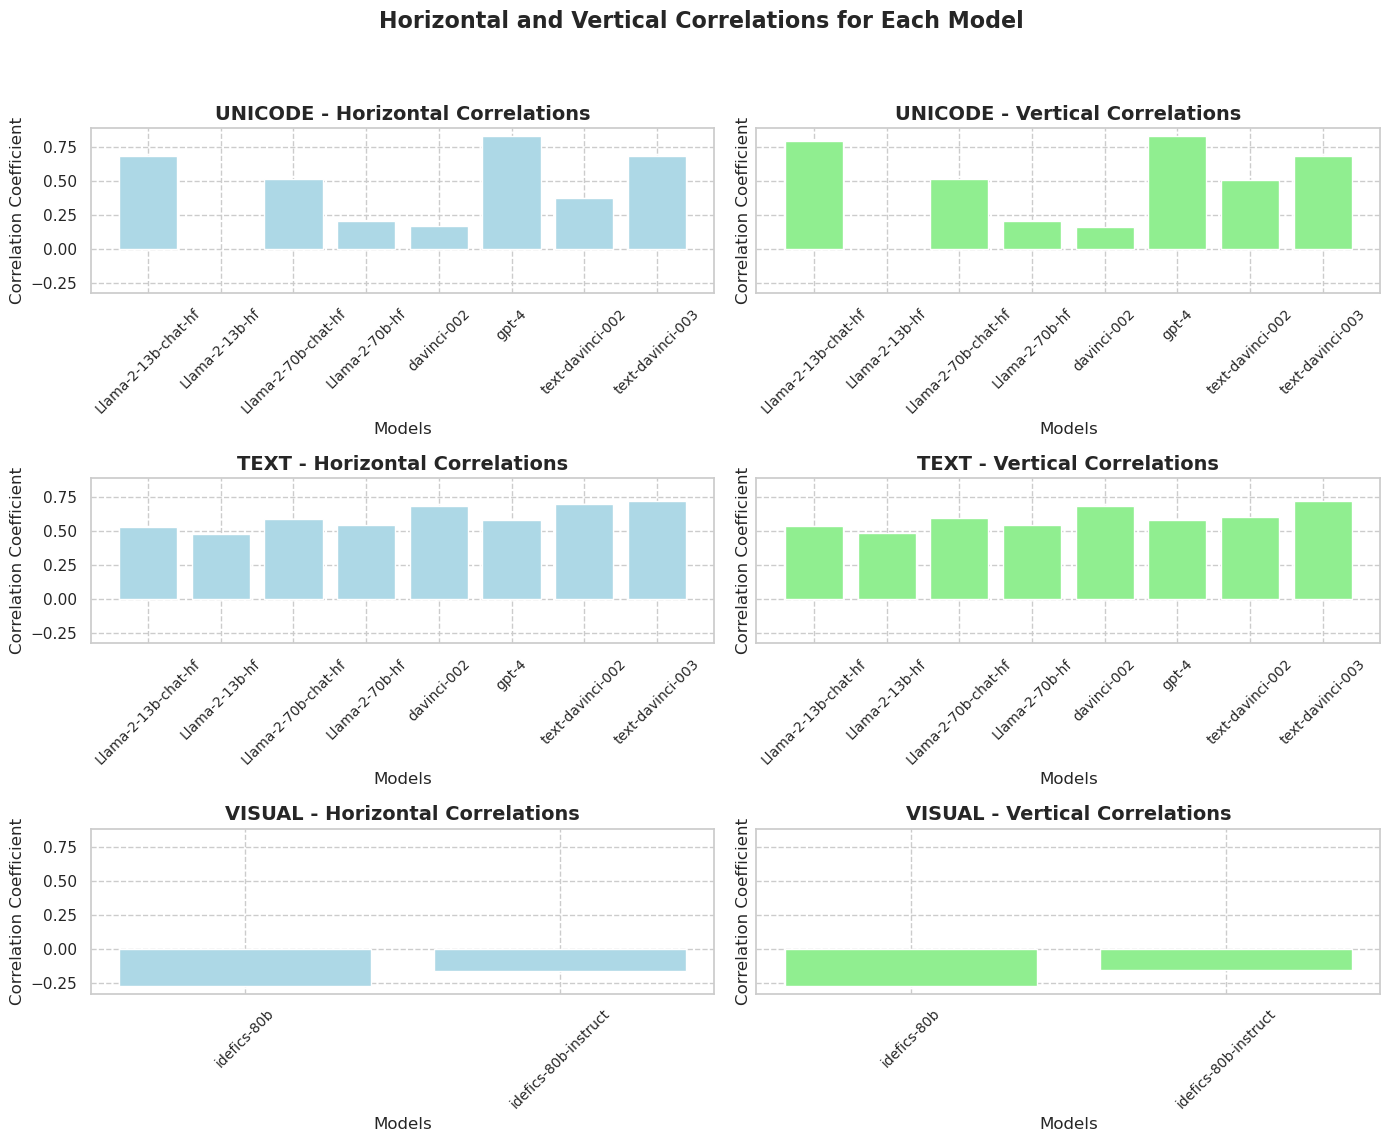

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming horizontal_correlations and vertical_correlations are already computed

# Set seaborn style
sns.set(style="whitegrid", palette="pastel", rc={"axes.edgecolor": ".8", "grid.linestyle": "--"})

# Set up subplots dynamically based on the number of conditions
num_conditions = len(horizontal_correlations)
fig, axes = plt.subplots(nrows=num_conditions, ncols=2, figsize=(14, 4 * num_conditions), sharey=True)
fig.suptitle('Horizontal and Vertical Correlations for Each Model', fontsize=16, weight='bold')

# Iterate through conditions
for i, (condition, models) in enumerate(horizontal_correlations.items()):
    # Extract unique models available in the current condition
    unique_models = sorted(models.keys())

    # Horizontal Correlations
    horizontal_vals = [horizontal_correlations[condition][model] for model in unique_models]
    axes[i, 0].bar(unique_models, horizontal_vals, color="lightblue")
    axes[i, 0].set_title(f'{condition} - Horizontal Correlations', fontsize=14, weight='bold')
    axes[i, 0].set_xlabel('Models', fontsize=12)
    axes[i, 0].set_ylabel('Correlation Coefficient', fontsize=12)
    axes[i, 0].tick_params(axis='x', rotation=45, labelsize=10)

    # Vertical Correlations
    vertical_vals = [vertical_correlations[condition][model] for model in unique_models]
    axes[i, 1].bar(unique_models, vertical_vals, color="lightgreen")
    axes[i, 1].set_title(f'{condition} - Vertical Correlations', fontsize=14, weight='bold')
    axes[i, 1].set_xlabel('Models', fontsize=12)
    axes[i, 1].set_ylabel('Correlation Coefficient', fontsize=12)
    axes[i, 1].tick_params(axis='x', rotation=45, labelsize=10)

    # Adjust subplot spacing
    plt.subplots_adjust(wspace=0.4)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


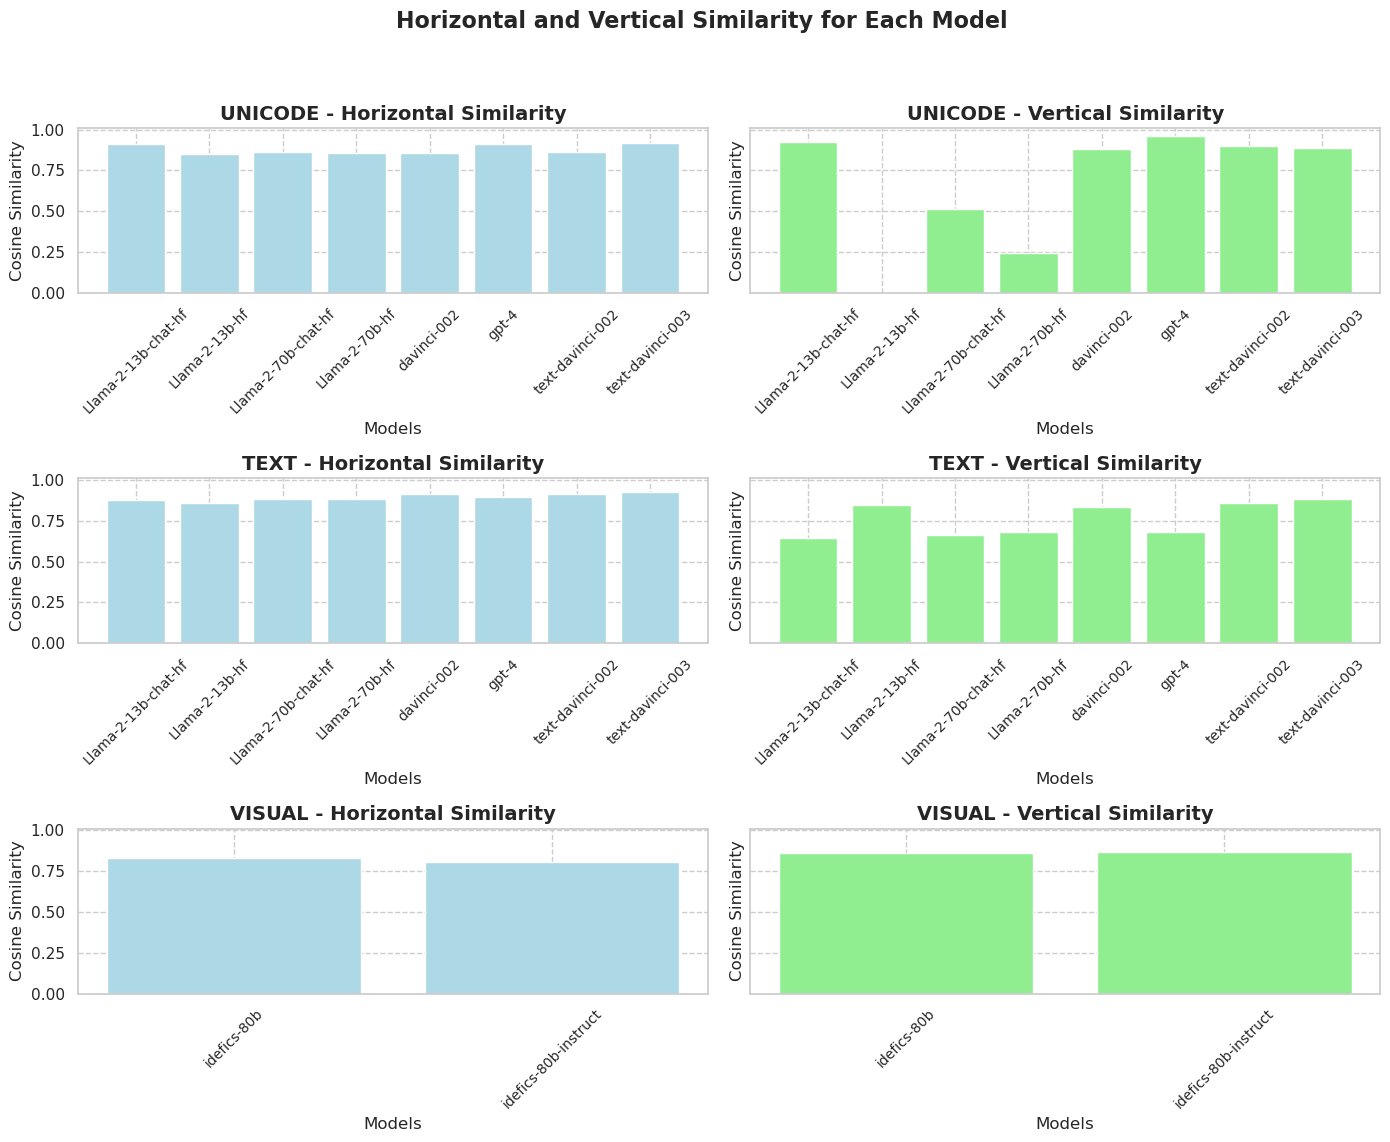

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming horizontal_correlations and vertical_correlations are already computed

# Set seaborn style
sns.set(style="whitegrid", palette="pastel", rc={"axes.edgecolor": ".8", "grid.linestyle": "--"})

# Set up subplots dynamically based on the number of conditions
num_conditions = len(horizontal_similarity)
fig, axes = plt.subplots(nrows=num_conditions, ncols=2, figsize=(14, 4 * num_conditions), sharey=True)
fig.suptitle('Horizontal and Vertical Similarity for Each Model', fontsize=16, weight='bold')

# Iterate through conditions
for i, (condition, models) in enumerate(horizontal_similarity.items()):
    # Extract unique models available in the current condition
    unique_models = sorted(models.keys())

    # Horizontal Correlations
    horizontal_vals = [horizontal_similarity[condition][model] for model in unique_models]
    axes[i, 0].bar(unique_models, horizontal_vals, color="lightblue")
    axes[i, 0].set_title(f'{condition} - Horizontal Similarity', fontsize=14, weight='bold')
    axes[i, 0].set_xlabel('Models', fontsize=12)
    axes[i, 0].set_ylabel('Cosine Similarity', fontsize=12)
    axes[i, 0].tick_params(axis='x', rotation=45, labelsize=10)

    # Vertical Correlations
    vertical_vals = [vertical_similarity[condition][model] for model in unique_models]
    axes[i, 1].bar(unique_models, vertical_vals, color="lightgreen")
    axes[i, 1].set_title(f'{condition} - Vertical Similarity', fontsize=14, weight='bold')
    axes[i, 1].set_xlabel('Models', fontsize=12)
    axes[i, 1].set_ylabel('Cosine Similarity', fontsize=12)
    axes[i, 1].tick_params(axis='x', rotation=45, labelsize=10)

    # Adjust subplot spacing
    plt.subplots_adjust(wspace=0.4)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


In [18]:
from scipy.stats import spearmanr

# Assuming horizontal_correlations and vertical_correlations are already computed

# Define conditions and models
conditions = list(horizontal_correlations.keys())
all_models = sorted(set(model for models in horizontal_correlations.values() for model in models.keys()))

# Specify the output file for storing correlation results
output_file = "results/all_spearmanr_HorVer.txt"

# Store correlation results in the text file
with open(output_file, 'w') as file:
    for condition in conditions:
        file.write(f"{condition}:\n")
        for model in all_models:
            horizontal_corr = horizontal_correlations[condition].get(model, "N/A")
            vertical_corr = vertical_correlations[condition].get(model, "N/A")
            file.write(f"{model}: Horizontal - {horizontal_corr}, Vertical - {vertical_corr}\n")
        file.write("\n")



In [26]:
from scipy.stats import spearmanr

# Assuming horizontal_correlations and vertical_correlations are already computed

# Define conditions and models
conditions = list(horizontal_pvals.keys())
all_models = sorted(set(model for models in horizontal_pvals.values() for model in models.keys()))

# Specify the output file for storing correlation results
output_file = "results/all_spearmanr_pvals_HorVer.txt"

# Store correlation results in the text file
with open(output_file, 'w') as file:
    for condition in conditions:
        file.write(f"{condition}:\n")
        for model in all_models:
            horizontal_pval = horizontal_pvals[condition].get(model, "N/A")
            vertical_pval = vertical_pvals[condition].get(model, "N/A")
            file.write(f"{model}: Horizontal - {horizontal_pval}, Vertical - {vertical_pval}\n")
        file.write("\n")



# Posthoc Test
Load all p-values that are relevant for the main results and do multiple-comparison correction using Benjamini-Hochberg correction


https://pingouin-stats.org/build/html/generated/pingouin.multicomp.html#pingouin.multicomp


https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html

In [49]:
p_val_file = "results/all_spearmanr_pvals_HorVer.txt"

# Load all p_values from the file
p_values = []
model_names = []
with open(p_val_file, 'r') as file:
    lines = file.readlines()

for line in lines:
    if line == "\n":
        continue
    elif line.startswith("TEXT") or line.startswith("UNICODE") or line.startswith("VISUAL") or line.startswith("Llama-2-13b-hf") or line.startswith("Llama-2-70b-hf") or line.startswith("text-davinci-002"):
        continue
    else:
        first_val = line.split("Horizontal - ")[1].split(",")[0]
        second_val = line.split(" ")[-1].replace("\n","")
        if first_val == "N/A" or second_val == "N/A":
            continue
        else:
            p_values.append(float(first_val))
            p_values.append(float(second_val))
            model_names.append(line.split(":")[0])
            model_names.append(line.split(":")[0])


In [38]:
len(p_values)

24

In [51]:
for i, pval in enumerate(p_values):
    print(model_names[i], pval)

Llama-2-13b-chat-hf 3.685179042482984e-05
Llama-2-13b-chat-hf 2.1644333790449302e-07
Llama-2-70b-chat-hf 0.003685550727747159
Llama-2-70b-chat-hf 0.0036900066007159635
davinci-002 0.37973081413804943
davinci-002 0.38750058973283685
gpt-4 1.758546235878276e-08
gpt-4 1.51360668739261e-08
text-davinci-003 3.6391356709035524e-05
text-davinci-003 3.545766111821321e-05
Llama-2-13b-chat-hf 0.002533180948131366
Llama-2-13b-chat-hf 0.0022554229758480976
Llama-2-70b-chat-hf 0.0006349788349333581
Llama-2-70b-chat-hf 0.000553376238286571
davinci-002 3.661601932534199e-05
davinci-002 3.22720148066056e-05
gpt-4 0.0008390091958352996
gpt-4 0.0007579513664723796
text-davinci-003 6.854153612255152e-06
text-davinci-003 7.734569315912002e-06
idefics-80b 0.15305794433794284
idefics-80b 0.1510249633540393
idefics-80b-instruct 0.4074559883457549
idefics-80b-instruct 0.4133274664588399


# FDR Correction (Missing GPT-4 Vision)

In [55]:
# Use statsmodels to calculate the corrected p-values using the Benjamini/Hochberg method
from statsmodels.stats.multitest import multipletests
corrected_pvals = multipletests(p_values, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)

for i, pval in enumerate(p_values):
    print(model_names[i], corrected_pvals[0][i], corrected_pvals[1][i])

Llama-2-13b-chat-hf True 8.844429701959162e-05
Llama-2-13b-chat-hf True 1.7315467032359442e-06
Llama-2-70b-chat-hf True 0.004920008800954618
Llama-2-70b-chat-hf True 0.004920008800954618
davinci-002 False 0.4133274664588399
davinci-002 False 0.4133274664588399
gpt-4 True 2.1102554830539315e-07
gpt-4 True 2.1102554830539315e-07
text-davinci-003 True 8.844429701959162e-05
text-davinci-003 True 8.844429701959162e-05
Llama-2-13b-chat-hf True 0.003799771422197049
Llama-2-13b-chat-hf True 0.003608676761356956
Llama-2-70b-chat-hf True 0.0012699576698667163
Llama-2-70b-chat-hf True 0.0012073663380797912
davinci-002 True 8.844429701959162e-05
davinci-002 True 8.844429701959162e-05
gpt-4 True 0.0014383014785747993
gpt-4 True 0.001399294830410547
text-davinci-003 True 3.712593271637761e-05
text-davinci-003 True 3.712593271637761e-05
idefics-80b False 0.1836695332055314
idefics-80b False 0.1836695332055314
idefics-80b-instruct False 0.4133274664588399
idefics-80b-instruct False 0.4133274664588399
